<a href="https://colab.research.google.com/github/adnan-kibria/cvpr_assignment/blob/main/MID/assignment_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import cv2
import random
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
dataset = '/content/drive/MyDrive/Dataset/animal_dataset'
categories = os.listdir(dataset)
categories = [c for c in categories if not c.startswith('.')]
print(categories)

['dog', 'panda', 'cat']


In [71]:
mapLabels = {categories[i]: i for i in range(len(categories))}
print("Label Mapping:", mapLabels)

Label Mapping: {'dog': 0, 'panda': 1, 'cat': 2}


In [94]:
data = []

for category in tqdm(categories, desc = 'Loading Images: '):
    path = os.path.join(dataset, category)
    classNumber = mapLabels[category]

    for img in os.listdir(path):
        imgArray = os.path.join(path, img)

        try:
            img = cv2.imread(imgArray, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"Skipping corrupted file: {imgArray}")
                continue

            img = cv2.resize(img, (32, 32))
            img = img / 255.0

            data.append((img, classNumber))

        except Exception as e:
            print(f"Error loading {imgArray}: {e}")
            continue

print("\nTotal Images:", len(data))

Loading Images: 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]


Total Images: 300


In [99]:
img, label = data[0]
print("Label:", label)
print("Array shape:", img.shape)
print(img)

Label: 0
Array shape: (32, 32)
[[0.14509804 0.29019608 0.36862745 ... 0.20784314 0.09803922 0.09019608]
 [0.38039216 0.38823529 0.37254902 ... 0.13333333 0.09019608 0.09803922]
 [0.38823529 0.4        0.37647059 ... 0.09019608 0.09411765 0.09803922]
 ...
 [0.61568627 0.62745098 0.62745098 ... 0.55686275 0.55686275 0.56078431]
 [0.61960784 0.63137255 0.63137255 ... 0.55686275 0.55686275 0.55686275]
 [0.61960784 0.61960784 0.61960784 ... 0.55686275 0.55686275 0.56078431]]


In [73]:
random.shuffle(data)

X = np.array([img for img, label in data]).reshape(-1, 32, 32, 1)
Y = np.array([label for img, label in data])

print("Total samples:", X.shape)

Total samples: (300, 32, 32, 1)


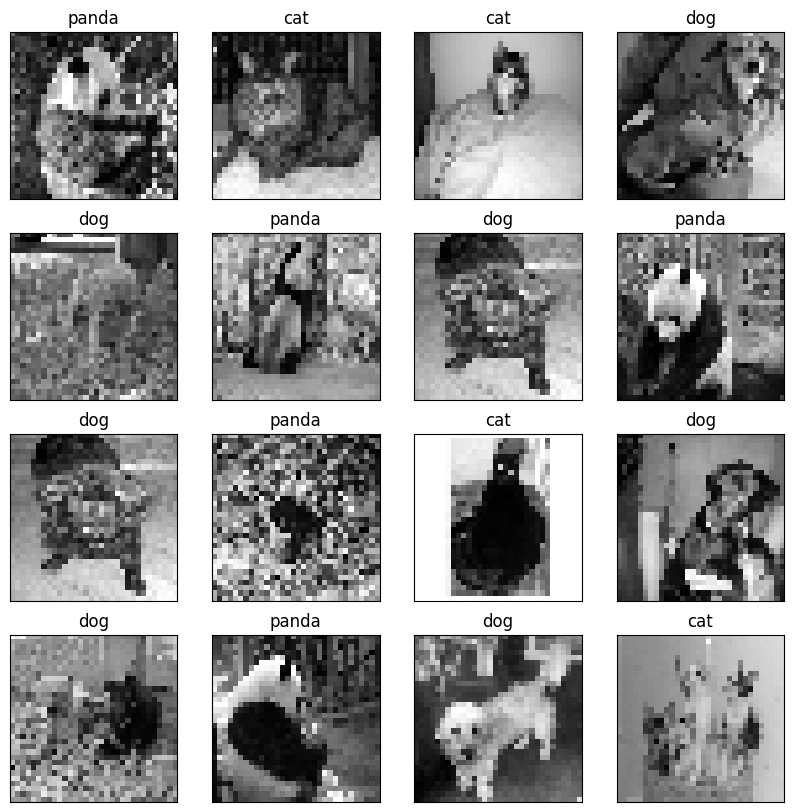

In [83]:
plt.figure(figsize=(10,10))
for i in range(16):
    index = random.randint(0, len(X)-1)
    plt.subplot(4,4,i+1)
    plt.imshow(X[index].reshape(32,32), cmap='gray')
    classNumber = Y[index]
    className = [k for k,v in mapLabels.items() if v == classNumber][0]
    plt.title(className)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [75]:
XFlat = X.reshape(len(X), -1)

In [76]:
def l1(x1, x2):
    return np.sum(np.abs(x1 - x2))

def l2(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [77]:
def knnPredict(xTrain, yTrain, xTest, k = 5, distance_metric = "L2"):
    distances = []

    for i in range(len(xTrain)):
        if distance_metric == "L1":
            dist = l1(xTrain[i], xTest)
        else:
            dist = l2(xTrain[i], xTest)

        distances.append((dist, yTrain[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = [distances[i][1] for i in range(k)]
    return max(set(neighbors), key=neighbors.count)

In [78]:
def fiveFoldCrossValidation(X, y, kValues, distance="L2"):
    foldSize = len(X) // 5
    results = {k: [] for k in kValues}

    for fold in range(5):
        start = fold * foldSize
        end = start + foldSize

        xValue = X[start:end]
        yValue = Y[start:end]

        xTrainFold = np.concatenate((X[:start], X[end:]))
        yTrainFold = np.concatenate((Y[:start], Y[end:]))

        print(f"\nFold {fold+1} — Distance: {distance}")

        for k in kValues:
            correct = 0
            for i in range(len(xValue)):
                pred = knnPredict(xTrainFold, yTrainFold, xValue[i], k, distance)
                if pred == yValue[i]:
                    correct += 1

            acc = correct / len(xValue)
            results[k].append(acc)
            print(f"K={k} Accuracy: {acc*100:.2f}%")

    return results

kValues = [1,3,5,7, 9]

l2Results = fiveFoldCrossValidation(XFlat, Y, kValues, distance="L2")
l1Results = fiveFoldCrossValidation(XFlat, Y, kValues, distance="L1")


Fold 1 — Distance: L2
K=1 Accuracy: 28.33%
K=3 Accuracy: 21.67%
K=5 Accuracy: 30.00%
K=7 Accuracy: 38.33%
K=9 Accuracy: 31.67%

Fold 2 — Distance: L2
K=1 Accuracy: 35.00%
K=3 Accuracy: 41.67%
K=5 Accuracy: 40.00%
K=7 Accuracy: 38.33%
K=9 Accuracy: 46.67%

Fold 3 — Distance: L2
K=1 Accuracy: 35.00%
K=3 Accuracy: 36.67%
K=5 Accuracy: 36.67%
K=7 Accuracy: 35.00%
K=9 Accuracy: 35.00%

Fold 4 — Distance: L2
K=1 Accuracy: 36.67%
K=3 Accuracy: 36.67%
K=5 Accuracy: 33.33%
K=7 Accuracy: 41.67%
K=9 Accuracy: 40.00%

Fold 5 — Distance: L2
K=1 Accuracy: 36.67%
K=3 Accuracy: 38.33%
K=5 Accuracy: 35.00%
K=7 Accuracy: 30.00%
K=9 Accuracy: 31.67%

Fold 1 — Distance: L1
K=1 Accuracy: 31.67%
K=3 Accuracy: 40.00%
K=5 Accuracy: 31.67%
K=7 Accuracy: 38.33%
K=9 Accuracy: 40.00%

Fold 2 — Distance: L1
K=1 Accuracy: 35.00%
K=3 Accuracy: 40.00%
K=5 Accuracy: 41.67%
K=7 Accuracy: 41.67%
K=9 Accuracy: 43.33%

Fold 3 — Distance: L1
K=1 Accuracy: 41.67%
K=3 Accuracy: 36.67%
K=5 Accuracy: 38.33%
K=7 Accuracy: 45.0

In [79]:
def summarizeResults(results, name):
    print(f'Summary result of {name}')
    averageAccuracy = {}

    for k, accList in results.items():
        average = np.mean(accList)
        averageAccuracy[k] = average
        print(f"K={k} → Avg Accuracy: {average*100:.2f}%")

    # best k
    bestK = max(averageAccuracy, key=averageAccuracy.get)
    bestAccuracy = averageAccuracy[bestK]

    print(f"Best K for {name} = {bestK} with Accuracy = {bestAccuracy*100:.2f}%\n")
    return bestAccuracy, bestK

l1bestAccuracy, l1BestK = summarizeResults(l1Results, "L1(Manhattan) Distance")
l2bestAccuracy, l2BestK = summarizeResults(l2Results, "L2(Euclidean) Distance")

if l2bestAccuracy > l1bestAccuracy:
    print(f"L2(Euclidean) distance is better ({l2bestAccuracy*100:.2f}%) compared to L1(Manhattan) distance ({l1bestAccuracy*100:.2f}%)")
else:
    print(f"L1(Manhattan) distance is better ({l1bestAccuracy*100:.2f}%) compared to L2(Euclidean) distance ({l2bestAccuracy*100:.2f}%)")


Summary result of L1(Manhattan) Distance
K=1 → Avg Accuracy: 36.00%
K=3 → Avg Accuracy: 38.00%
K=5 → Avg Accuracy: 37.00%
K=7 → Avg Accuracy: 39.67%
K=9 → Avg Accuracy: 40.67%
Best K for L1(Manhattan) Distance = 9 with Accuracy = 40.67%

Summary result of L2(Euclidean) Distance
K=1 → Avg Accuracy: 34.33%
K=3 → Avg Accuracy: 35.00%
K=5 → Avg Accuracy: 35.00%
K=7 → Avg Accuracy: 36.67%
K=9 → Avg Accuracy: 37.00%
Best K for L2(Euclidean) Distance = 9 with Accuracy = 37.00%

L1(Manhattan) distance is better (40.67%) compared to L2(Euclidean) distance (37.00%)


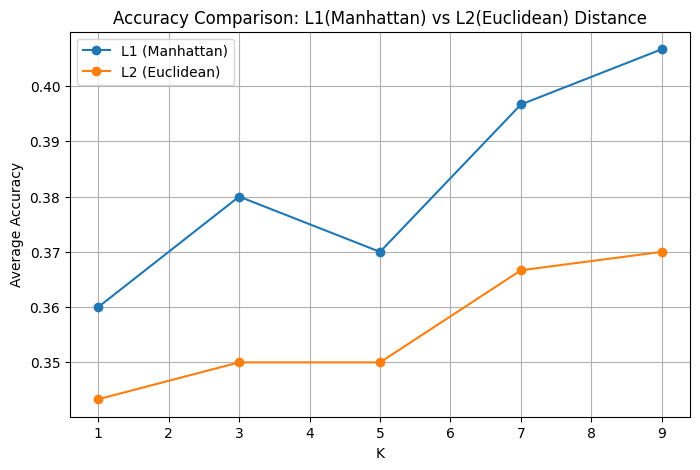

In [80]:
averageL1 = [np.mean(l1Results[k]) for k in kValues]
averageL2 = [np.mean(l2Results[k]) for k in kValues]

plt.figure(figsize=(8,5))
plt.plot(kValues, averageL1, marker='o', label="L1 (Manhattan)")
plt.plot(kValues, averageL2, marker='o', label="L2 (Euclidean)")
plt.xlabel("K")
plt.ylabel("Average Accuracy")
plt.title("Accuracy Comparison: L1(Manhattan) vs L2(Euclidean) Distance")
plt.grid(True)
plt.legend()
plt.show()

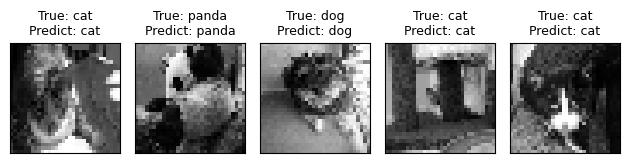

In [81]:
def top5Predictions(index):
    distances = []
    for i in range(len(XFlat)):
        dist = l2(XFlat[index], XFlat[i])
        distances.append((dist, Y[i]))

    distances.sort(key=lambda x: x[0])
    top5 = distances[:5]
    return [y for d, y in top5]

for i in range(5):
    index = random.randint(0, len(XFlat) - 1)

    img = X[index].reshape(32,32)

    tLabel = Y[index]
    trueLabels = list(mapLabels.keys())[list(mapLabels.values()).index(tLabel)]

    preds = top5Predictions(index)
    p = preds[0]
    predictionLabels = list(mapLabels.keys())[list(mapLabels.values()).index(p)]

    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {trueLabels}\nPredict: {predictionLabels}", fontsize=9)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

# Discussion
Manhattan(L1) distance metric outperformed Euclidean(L2) distance metric because the gray scale image dataset is 32x32 dimension of each image. And Manhattan(L1) distance metric is suitable for dimensional dataset. If this dataset is a non-dimensional dataset where straight line can be done then Euclidean(L2) distance would have outperformed Manhattan(L1) distance metric.

## Limitations
1. Dataset is too small contains only 300 images and 100 images per class and dataset is consist of 3 classes so variability is limited.
2. K-Nearest Neighbour(KNN) algorithm is noise sensetive algorithm and there is no option for using other algorithm such as Convolutional Neural Network(CNN).

## Improvements
1. More hyperparameter or K values can be explored because in this assignment only explored hyperparameters are 1, 3, 5, 7 and 9.
2. Different algorithm can improve the result such as CNN, SVM.